DataFrame Transaction Amount:
   TransactionAmount
0                100
1                150
2                 50
3                100
4                130

Measure of Central Tendency:
Mean: 102.6
Median: 100.0
Mode: 100

Measure of Variability:
Range: 100
Variance: 1012.7499999999997
Standard Deviation: 31.82373328193912
Interquartile Range (IQR): 35.0

Hipotesis:
H0: Rata-rata transaksi setelah training = $100
H1: Rata-rata transaksi setelah training ≠ $100

Hasil Uji T-Test:
T-Statistic: 0.4085001556802841
P-Value: 0.6865284813438117
Karena p-value > 0.05, kita gagal menolak H0. Tidak ada bukti kuat bahwa training berpengaruh pada transaksi.


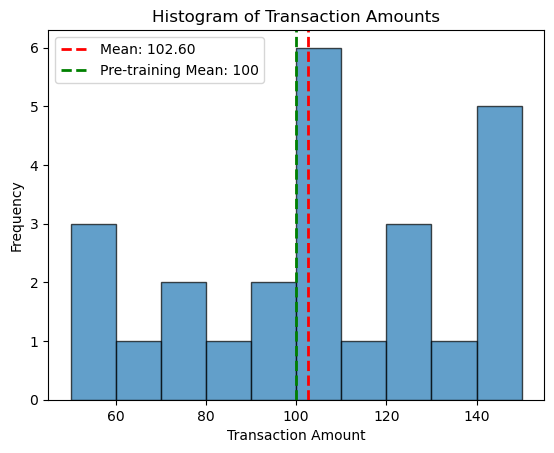

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Data transaksi setelah training
transaction_data = [
    100, 150, 50, 100, 130, 120, 100, 85, 70, 150, 150, 120, 50, 100, 100,
    140, 90, 150, 50, 90, 120, 100, 110, 75, 65
]

# 1. Membuat DataFrame
transaction_df = pd.DataFrame(transaction_data, columns=['TransactionAmount'])
print("DataFrame Transaction Amount:")
print(transaction_df.head())

# 2. Measure of Central Tendency
mean_value = transaction_df["TransactionAmount"].mean()
median_value = transaction_df["TransactionAmount"].median()
mode_value = transaction_df["TransactionAmount"].mode()[0]

print("\nMeasure of Central Tendency:")
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")

# 3. Measure of Variability
range_value = transaction_df["TransactionAmount"].max() - transaction_df["TransactionAmount"].min()
variance_value = transaction_df["TransactionAmount"].var()
std_dev_value = transaction_df["TransactionAmount"].std()
iqr_value = np.percentile(transaction_data, 75) - np.percentile(transaction_data, 25)

print("\nMeasure of Variability:")
print(f"Range: {range_value}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_dev_value}")
print(f"Interquartile Range (IQR): {iqr_value}")

# 4. Menentukan Hipotesis
mu_0 = 100  # Rata-rata sebelum training
print("\nHipotesis:")
print("H0: Rata-rata transaksi setelah training = $100")
print("H1: Rata-rata transaksi setelah training ≠ $100")

# 5. Melakukan Uji T-Test
alpha = 0.05
stat, p_value = stats.ttest_1samp(transaction_data, mu_0)

print("\nHasil Uji T-Test:")
print(f"T-Statistic: {stat}")
print(f"P-Value: {p_value}")

# 6. Kesimpulan
if p_value < alpha:
    print("Karena p-value < 0.05, kita tolak H0. Training memiliki pengaruh signifikan terhadap rata-rata transaksi.")
else:
    print("Karena p-value > 0.05, kita gagal menolak H0. Tidak ada bukti kuat bahwa training berpengaruh pada transaksi.")

# Visualisasi Distribusi Data
plt.hist(transaction_data, bins=10, edgecolor='black', alpha=0.7)
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(mu_0, color='g', linestyle='dashed', linewidth=2, label='Pre-training Mean: 100')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Transaction Amounts')
plt.legend()
plt.show()
